<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Empirical-Input-Modelling" data-toc-modified-id="Empirical-Input-Modelling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Empirical Input Modelling</a></span><ul class="toc-item"><li><span><a href="#Non-Parametric-Modelling" data-toc-modified-id="Non-Parametric-Modelling-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Non-Parametric Modelling</a></span></li><li><span><a href="#Empirical-Modelling" data-toc-modified-id="Empirical-Modelling-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Empirical Modelling</a></span></li><li><span><a href="#Empirical-Modelling-of-Grouped-Data" data-toc-modified-id="Empirical-Modelling-of-Grouped-Data-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Empirical Modelling of Grouped Data</a></span></li></ul></li><li><span><a href="#Fitting-of-a-Theoretical-Distribution-for-Service-Time" data-toc-modified-id="Fitting-of-a-Theoretical-Distribution-for-Service-Time-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Fitting of a Theoretical Distribution for Service Time</a></span><ul class="toc-item"><li><span><a href="#Check-Independence-of-Data" data-toc-modified-id="Check-Independence-of-Data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Check Independence of Data</a></span></li><li><span><a href="#Select-Suitable-Distribution-Function" data-toc-modified-id="Select-Suitable-Distribution-Function-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Select Suitable Distribution Function</a></span></li><li><span><a href="#Parameter-Estimation" data-toc-modified-id="Parameter-Estimation-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Parameter Estimation</a></span><ul class="toc-item"><li><span><a href="#Plotting-Routine-(same-as-before)" data-toc-modified-id="Plotting-Routine-(same-as-before)-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Plotting Routine (same as before)</a></span></li><li><span><a href="#Plot" data-toc-modified-id="Plot-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Plot</a></span></li></ul></li><li><span><a href="#Goodness-of-Fit-Test-(χ²)" data-toc-modified-id="Goodness-of-Fit-Test-(χ²)-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Goodness-of-Fit-Test (χ²)</a></span></li></ul></li><li><span><a href="#Fitting-of-a-Theoretical-Distribution-for-Inter-Arrival-Time" data-toc-modified-id="Fitting-of-a-Theoretical-Distribution-for-Inter-Arrival-Time-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Fitting of a Theoretical Distribution for Inter Arrival Time</a></span><ul class="toc-item"><li><span><a href="#Check-Independence-of-Data" data-toc-modified-id="Check-Independence-of-Data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Check Independence of Data</a></span></li><li><span><a href="#Select-Suitable-Distribution-Function" data-toc-modified-id="Select-Suitable-Distribution-Function-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Select Suitable Distribution Function</a></span></li><li><span><a href="#Parameter-Estimation" data-toc-modified-id="Parameter-Estimation-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Parameter Estimation</a></span><ul class="toc-item"><li><span><a href="#Plotting-Routine-(same-as-before)" data-toc-modified-id="Plotting-Routine-(same-as-before)-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Plotting Routine (same as before)</a></span></li><li><span><a href="#Plot" data-toc-modified-id="Plot-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Plot</a></span></li></ul></li><li><span><a href="#Goodness-of-Fit-Test" data-toc-modified-id="Goodness-of-Fit-Test-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Goodness-of-Fit-Test</a></span></li></ul></li></ul></div>

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd
import random
import math

In [2]:
dt=pd.read_csv('ATM.csv')

In [3]:
dt

,IAT,ST
0,121,56
1,13,51
2,87,73
3,36,65
4,7,84
5,236,58
6,8,62
7,33,69
8,152,44
9,67,66


In [4]:
random.seed(0)

# Empirical Input Modelling

## Non-Parametric Modelling

Picks with constant probability one of the empirical values obtained

In [5]:
def st():
    u=random.random()*len(dt)
    return dt['ST'][math.floor(u)]

In [6]:
data=pd.DataFrame([st() for i in range(100000)])

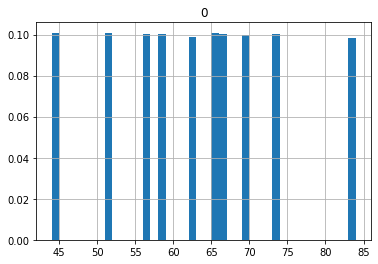

In [7]:
data.hist(bins=40, density=True)
plt.grid(True)

## Empirical Modelling

In [8]:
dts=pd.DataFrame(dt.sort_values(by=['ST']))
dts['U']=np.arange(len(dts))/(len(dts)-1)
dts=dts.set_index(np.arange(len(dts)))
dts['DST']=dts['ST']-dts['ST'].shift(1)
dts.loc[0, 'DST']=0
dts['DU/DST']=1/(len(dts)-1)/dts['DST']
dts.loc[0, 'DU/DST']=0
dts

,IAT,ST,U,DST,DU/DST
0,152,44,0.000000,0.0,0.000000
1,13,51,0.111111,7.0,0.015873
2,121,56,0.222222,5.0,0.022222
3,236,58,0.333333,2.0,0.055556
4,8,62,0.444444,4.0,0.027778
5,36,65,0.555556,3.0,0.037037
6,67,66,0.666667,1.0,0.111111
7,33,69,0.777778,3.0,0.037037
8,87,73,0.888889,4.0,0.027778
9,7,84,1.000000,11.0,0.010101


Plot corresponds to Fig.3.1. Choi/Kang p.47

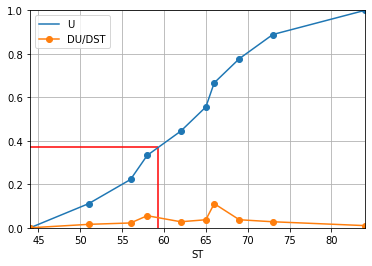

In [9]:
ax=dts.plot(x='ST',y='U', marker='o', ylim=(0,1))
ax=dts.plot(x='ST',y='DU/DST', marker='o', ax=ax)
ax.hlines(y=0.369881,xmin=0, xmax=59.316, colors='red')
ax.vlines(x=59.316, ymin=0, ymax=0.369881, colors='red')
plt.grid(True)

In [10]:
def est():
    u=random.random()
    s=u*(len(dt)-1)
    i=math.floor(s)+1
    x0=dts['ST'][i-1]
    x1=dts['ST'][i]
    return x0+(s-i+1)*(x1-x0)

In [11]:
edata=pd.DataFrame([est() for i in range(100000)])

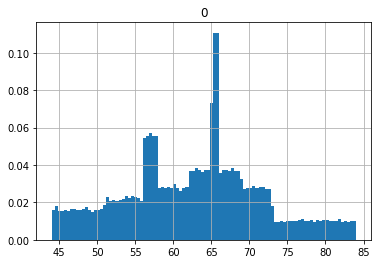

In [12]:
edata.hist(bins=100, density=True)
plt.grid(True)

## Empirical Modelling of Grouped Data

In [13]:
bins=[40,50,60,70,80,90]

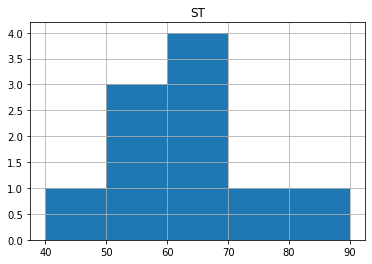

In [14]:
dt.hist('ST', bins=bins)
plt.grid(True)

In [15]:
hist, _ = np.histogram(dt['ST'], bins=bins)
G = [0] + (np.cumsum(hist)/np.sum(hist)).tolist()
G

[0, 0.1, 0.4, 0.8, 0.9, 1.0]

In [16]:
def gst():
    u=random.random()
    for i in range(len(G)-1):
        if G[i]<=u and u<G[i+1]:
            return bins[i]+(u-G[i])*(bins[i+1]-bins[i])/(G[i+1]-G[i])
    else:
        return bins[-1]

In [17]:
gdata=pd.DataFrame([gst() for i in range(100000)])

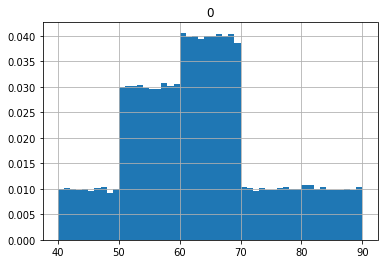

In [18]:
gdata.hist(bins=50, density=True)
plt.grid(True)

# Fitting of a Theoretical Distribution for Service Time

## Check Independence of Data

In [19]:
dt['STS']=dt['ST'].shift(-1)
dt

,IAT,ST,STS
0,121,56,51.0
1,13,51,73.0
2,87,73,65.0
3,36,65,84.0
4,7,84,58.0
5,236,58,62.0
6,8,62,69.0
7,33,69,44.0
8,152,44,66.0
9,67,66,NaN


If it looks scattered randomly, it is probably independent.

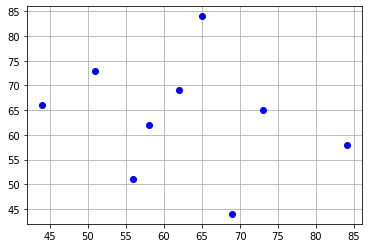

In [20]:
plt.plot(dt['ST'], dt['STS'], 'bo')
plt.grid(True)

## Select Suitable Distribution Function

For service time, a normal distribution is a reasonable approach.

## Parameter Estimation

In [21]:
μ=dts['ST'].mean()
σ=dts['ST'].std()

### Plotting Routine (same as before)

In [22]:
def plot(data, hist=None, pdf=None, bins=None, 
         μ=None, σ=None,
         xmin=None, xmax=None, ymax=None, 
         title=None, fig=None, ax=None, xlabel=None, ylabel=None):
    
    if fig==None:
        fig = plt.figure()
        fig.set_figwidth(10)
        fig.set_figheight(5)
    
    if ax==None:
        ax = fig.gca()
        
     
    # set the range on the x-axis
    if hist!=None:
        # ignore data
        xmin=-0.5
        xmax=len(hist)+0.5
        bins=len(hist)
        if ymax==None:
            ymax=1.1*max(hist)/sum(hist)
        if μ==None:
            μ = hist_mean(hist)
    else: 
        if xmin==None:
            xmin = math.floor(np.min(data)*10)/10
        if xmax==None:
            xmax = math.ceil(np.max(data)*11)/10
        if bins==None:
            bins=int(4*math.log(len(data)))
        if μ==None:
            μ = np.mean(data)
        if σ==None:
            σ = np.std(data)  
        
    ax.set_xlim(xmin, xmax)
    
    if ymax!=None:
        ax.set_ylim(0, ymax)
    
    if title!=None:
        plt.title(title)
        
    if hist!=None:  
        # ignore data
        for x in range(len(hist)):
            ax.axvline(x=x, ymin=0, ymax=(hist[x]/sum(hist))/ymax, lw=10)
    else:
        plt.hist(data, bins=bins, density=True)
    
    # calculate parameter for text positioning
    dx=(xmax-xmin)*0.02
    ymin, ymax=plt.ylim()
    ypos=ymin+0.9*(ymax-ymin)
     
    # plot the probability density function if one is given
    if pdf!=None:
        X = [ i/1000 for i in range(int(xmin*1000), int(xmax*1000)) ]
        Y = [ pdf(x) for x in X]
        plt.plot(X, Y, lw=2, color='red')
 
    ax.axvline(x=μ, color='red', linestyle='dashed', lw=2)
    plt.text(μ+dx, ypos, f"μ={μ:3.2f}", color='red', fontsize=14)
    
    if xlabel!=None:
        ax.set_xlabel(xlabel)
    if ylabel!=None:
        ax.set_ylabel(ylabel)
        
    plt.grid(True)

### Plot

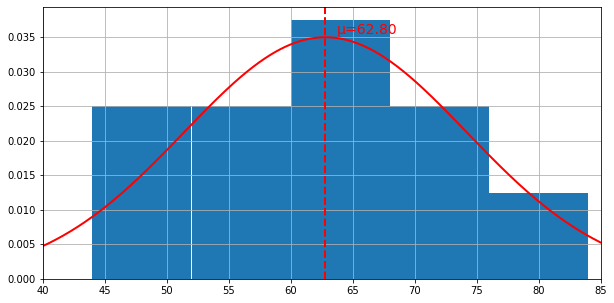

In [23]:
norm=stats.norm(loc=μ, scale=σ)
plot(dts['ST'], pdf=norm.pdf, xmin=40, xmax=85, bins=5)

## Goodness-of-Fit-Test (χ²)

In [24]:
stats.normaltest(dt['ST'])

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


NormaltestResult(statistic=0.2963571058151083, pvalue=0.862277139105733)

In [25]:
stats.shapiro(dt['ST'])

ShapiroResult(statistic=0.9927406311035156, pvalue=0.9990953803062439)

In [26]:
stats.kstest(dt['ST'], norm.cdf)

KstestResult(statistic=0.09326582892260815, pvalue=0.9999145891042519)

In [27]:
tdata=pd.DataFrame(norm.rvs(1000000))

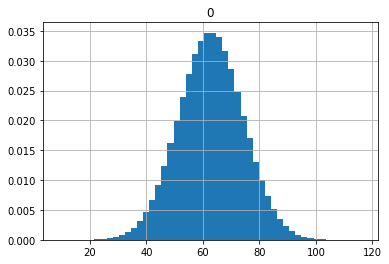

In [28]:
tdata.hist(bins=50, density=True)
plt.grid(True)

# Fitting of a Theoretical Distribution for Inter Arrival Time

## Check Independence of Data

In [29]:
dt['IATS']=dt['IAT'].shift(-1)
dt

,IAT,ST,STS,IATS
0,121,56,51.0,13.0
1,13,51,73.0,87.0
2,87,73,65.0,36.0
3,36,65,84.0,7.0
4,7,84,58.0,236.0
5,236,58,62.0,8.0
6,8,62,69.0,33.0
7,33,69,44.0,152.0
8,152,44,66.0,67.0
9,67,66,NaN,NaN


If it looks scattered randomly, it is probably independent.

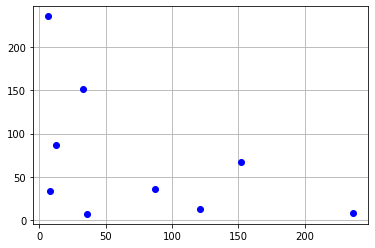

In [30]:
plt.plot(dt['IAT'], dt['IATS'], 'bo')
plt.grid(True)

## Select Suitable Distribution Function

For inter-arrival time an exponential distribution is a reasonable approach.

## Parameter Estimation

In [31]:
μ=dts['IAT'].mean()

### Plotting Routine (same as before)

In [32]:
def plot(data, hist=None, pdf=None, bins=None, 
         μ=None, σ=None,
         xmin=None, xmax=None, ymax=None, 
         title=None, fig=None, ax=None, xlabel=None, ylabel=None):
    
    if fig==None:
        fig = plt.figure()
        fig.set_figwidth(10)
        fig.set_figheight(5)
    
    if ax==None:
        ax = fig.gca()
        
     
    # set the range on the x-axis
    if hist!=None:
        # ignore data
        xmin=-0.5
        xmax=len(hist)+0.5
        bins=len(hist)
        if ymax==None:
            ymax=1.1*max(hist)/sum(hist)
        if μ==None:
            μ = hist_mean(hist)
    else: 
        if xmin==None:
            xmin = math.floor(np.min(data)*10)/10
        if xmax==None:
            xmax = math.ceil(np.max(data)*11)/10
        if bins==None:
            bins=int(4*math.log(len(data)))
        if μ==None:
            μ = np.mean(data)
        if σ==None:
            σ = np.std(data)  
        
    ax.set_xlim(xmin, xmax)
    
    if ymax!=None:
        ax.set_ylim(0, ymax)
    
    if title!=None:
        plt.title(title)
        
    if hist!=None:  
        # ignore data
        for x in range(len(hist)):
            ax.axvline(x=x, ymin=0, ymax=(hist[x]/sum(hist))/ymax, lw=10)
    else:
        plt.hist(data, bins=bins, density=True)
    
    # calculate parameter for text positioning
    dx=(xmax-xmin)*0.02
    ymin, ymax=plt.ylim()
    ypos=ymin+0.9*(ymax-ymin)
     
    # plot the probability density function if one is given
    if pdf!=None:
        X = [ i/1000 for i in range(int(xmin*1000), int(xmax*1000)) ]
        Y = [ pdf(x) for x in X]
        plt.plot(X, Y, lw=2, color='red')
 
    ax.axvline(x=μ, color='red', linestyle='dashed', lw=2)
    plt.text(μ+dx, ypos, f"μ={μ:3.2f}", color='red', fontsize=14)
    
    if xlabel!=None:
        ax.set_xlabel(xlabel)
    if ylabel!=None:
        ax.set_ylabel(ylabel)
        
    plt.grid(True)

### Plot

In [ ]:
exp=stats.expon(scale=μ)
plot(dts['IAT'], pdf=exp.pdf, xmin=0, xmax=250, bins=[0,50,100,150,200,250])

## Goodness-of-Fit-Test

In [ ]:
stats.kstest(dt['IAT'], exp.cdf)

In [ ]:
tdata=pd.DataFrame(exp.rvs(1000000))

In [ ]:
tdata.hist(bins=50, density=True)
plt.grid(True)